In [16]:
import json
import logging

import rich
import dotenv

import networkx
import random

In [17]:
from twon_lss.simulations.twon_base import (
    Simulation,
    SimulationArgs,
    Ranker,
    Agent,
    AgentInstructions,
)

from twon_lss.schemas import Post, User, Feed, Network
from twon_lss.utility import LLM, Message

In [18]:
logging.getLogger().setLevel(logging.DEBUG)

In [19]:
NUM_AGENTS: int = 16 # DEBUG
LENGTH_AGENT_MEMORY: int = 20 # high

In [20]:
ENV = dotenv.dotenv_values("../" * 3 + ".env")
AGENTS_INSTRUCTIONS_CFG = json.load(open("./data/agents.instructions.json"))
AGENTS_PERSONAS_CFG = json.load(open("./data/agents.personas.json"))

rich.print(AGENTS_INSTRUCTIONS_CFG)
rich.print(len(AGENTS_PERSONAS_CFG))

{
    'persona': "You are a social media user responding to conversations. Keep your replies and tweets consistent 
with your previous writing style and the perspectives you've expressed earlier.",
    'actions': {
        'read_and_like_prompt': 'Read the tweet and decide if you want to like it or just read it:',
        'post_prompt': 'Write a tweet.',
        'read_confirmation': 'I have read the tweet.',
        'read_and_like_confirmation': 'I have read the tweet and like it!'
    }
}

2158

In [21]:
# Shuffle personas
AGENTS_PERSONAS_CFG = random.sample(AGENTS_PERSONAS_CFG, k = NUM_AGENTS)

In [22]:
RANKER = Ranker(
    llm=LLM(api_key=ENV["HF_TOKEN"], model="BAAI/bge-m3", url="https://router.huggingface.co/hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity"),
)

In [23]:
# solution for real user name
USERS = [User() for _ in range(NUM_AGENTS)]

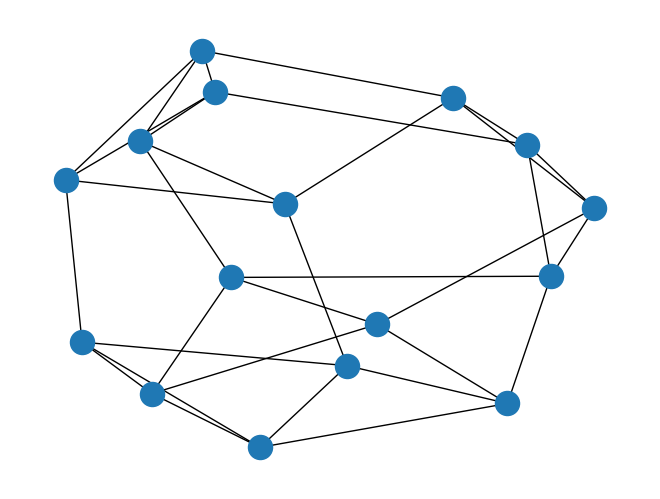

In [24]:
NETWORK = Network.from_graph(networkx.random_regular_graph(4, len(USERS)), USERS)
networkx.draw(NETWORK.root)

In [25]:
histories = [
    [message.get("content") for message in persona["messages"] if message.get("role") == "assistant"]
    for persona in AGENTS_PERSONAS_CFG
]

In [26]:
FEED = Feed(
    [
        Post(user=user, content=post)
        for user, history in zip(USERS, histories, strict=False)
        for post in history[:1]
    ]
)
len(FEED)

16

In [27]:
AGENT_LLM = LLM(api_key=ENV["HF_TOKEN"], model="meta-llama/Llama-3.1-8B-Instruct:cerebras")

In [ ]:
INDIVIDUALS = {
    user: Agent(
        llm=AGENT_LLM,
        instructions=AgentInstructions(
            persona=AGENTS_INSTRUCTIONS_CFG["persona"], **AGENTS_INSTRUCTIONS_CFG["actions"]
        ),
        memory=history["messages"][1:15],
        memory_length=LENGTH_AGENT_MEMORY,
    )
    for user, history in zip(
        USERS, AGENTS_PERSONAS_CFG, strict=False
    )
}
rich.print(INDIVIDUALS.get(USERS[0]))

In [29]:
simulation = Simulation(
    args=SimulationArgs(num_steps=5, num_posts_to_interact_with=2),
    ranker=RANKER,
    individuals=INDIVIDUALS,
    network=NETWORK,
    feed=FEED,
)

DEBUG:root:>f init simulation


In [30]:
simulation()

Output()

DEBUG:root:>f simulate step n=0
DEBUG:root:len(feed)=16
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 23
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 23
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 23
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 20
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 21
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 22
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 23
DEBUG:root:>i number of feed items 4 for user user-e5243b83-ead3-40b4-aea8-dc05313c5a8f
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: The Republican party's biggest problem isn't Trump, it's the willingness to enable extremism and disregard for democracy. That’s what’s going to haunt them for a long time.
DEBUG:root:>i number of feed items 4 for user user-0b476e7d-5bb2-459f-8961-74cf0e1adcea
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: FREEZE WARNING until 08:00 AM Central Time for multiple counties in IA. expect icy roads to be hazardous
DEBUG:root:>i number of feed items 4 for user user-ed443af0-baab-4855-99e0-35a1a1ce144d
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: No better way to spend a Sunday than with the Bills Mafia cheering on our @BuffaloBills to victory
DEBUG:root:>i number of feed items 4 for user user-6e4200aa-2417-411c-a6f2-584e0a826f59
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Big congratulations to the winners of our latest contest! Emily and Kate, I'll be sending out your copies of Fortune's Blade shortly. Thanks to everyone who entered and for your enthusiasm for Dory's adventures! #DoryLedesma #KarenChanceBooks
DEBUG:root:>i number of feed items 4 for user user-77c6e631-9b5d-4076-8228-723a15b6289e
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet,
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "Still waiting for a politician to be honest about voter disenfranchisement, healthcare, and the economy... till then, we'll just be subjected to reheated talking points" #PoliticsAsUsual
DEBUG:root:>i number of feed items 4 for user user-46487220-1b56-43ef-83f2-0717f27bd9fb
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: People seem to forget Byron Buxton has a 70-grade speed.
DEBUG:root:>i number of feed items 4 for user user-5f70ad84-4ac5-4759-b6fb-2dfde92f40ae
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I'm more attracted to the idea of taking my foot and stomping my foot in anger than I am to "taking a deep breath" and "calming down".
DEBUG:root:>i number of feed items 4 for user user-03814cfa-29f2-4cc8-a904-f752879c921d
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "Folks, don't be surprised when the GOP tries to rig the 2024 elections. They've been planning this for years. Stay vigilant and demand transparency in our democracy! #SaveDemocracy #VoteBlue"
DEBUG:root:>i number of feed items 4 for user user-789d3e9a-4b93-4954-b353-16935fb11f72
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: 'I have read the tweet and like it!'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None


DEBUG:root:Agent response: Seattle just got a real owner for their hockey team. Not a Billionaire.
DEBUG:root:>i number of feed items 4 for user user-30aa66b3-d3ee-4236-b7f6-ebf8aa42549e
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Just got done with a round of golf and a pint with @Joey Logano. We're looking like a good looking couple out there on the course
DEBUG:root:>i number of feed items 4 for user user-a393f1de-077f-464e-afe7-443276a74ec4
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: @patsfan32 Just another fake outrage by the corrupt FBI...
DEBUG:root:>i number of feed items 4 for user user-c4c0a3db-756d-4438-8340-595e59045ce4


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "The things that make me happiest are usually the things that also fill me with existential dread."
DEBUG:root:>i number of feed items 4 for user user-7042372f-cd79-4fa4-9119-f1846eb900ac
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Special thanks to all our fans who showed up to the track this weekend. The energy in the stands was electric! Your support is what makes this all worth it. Appreciate you all from the bottom of my heart. #Racing #Fans #Support
DEBUG:root:>i number of feed items 4 for user user-485a6175-b856-4ec2-8c7a-cde6dd2782ff
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Life is a lot simpler when the person you are , the thing you have and the place you are in are all exactly where they need to be ❤️ Find what fulfills you because that's what truly matters
DEBUG:root:>i number of feed items 4 for user user-4266bd5d-95b1-4940-82d7-bfb7668ae366
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: NBA Playoffs ⛈️

Pacers/76ers 1Q ML o10 -130 1U
DEBUG:root:>i number of feed items 4 for user user-8099f6eb-fe64-48fe-98ac-ed0a3f04ae14
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Soul kitchen. Still ain't used to livin', but I guess this is what they mean by breakin' the chains.
DEBUG:root:>f simulate step n=1
DEBUG:root:len(feed)=32
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 44
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 44
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 44
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 46
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 39
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 39
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 44
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 39
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 39
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 46
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 44
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 44


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 44
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 39
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 44
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 40
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 42
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 43
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 41
DEBUG:root:>i number of feed items 6 for user user-e5243b83-ead3-40b4-aea8-dc05313c5a8f
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None


DEBUG:root:Agent response: What's more American than a middle-aged guy complaining about inflation while his family and friends struggle to make ends meet? Not much.
DEBUG:root:>i number of feed items 6 for user user-0b476e7d-5bb2-459f-8961-74cf0e1adcea
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: TRAFFIC ADVISORY on US 20: Iowa 175 to CR Y27. traffic may be affected by the wind
DEBUG:root:>i number of feed items 6 for user user-ed443af0-baab-4855-99e0-35a1a1ce144d
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: A Sunday at the ballpark, what could be better? #Orioles
DEBUG:root:>i number of feed items 6 for user user-6e4200aa-2417-411c-a6f2-584e0a826f59
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Get ready for more Dory! I've just started working on the next Dory story, and I'm excited to see what adventures come next for the war mage and her...complicated...relationships. #DoryLedesma #KarenChanceBooks
DEBUG:root:>i number of feed items 6 for user user-77c6e631-9b5d-4076-8228-723a15b6289e
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "It's time to stop blaming institutions and individuals for systemic failures, and take a hard look at the policies that create those problems in the first place" #StructuralChangeOverBandAidSolutions
DEBUG:root:>i number of feed items 6 for user user-46487220-1b56-43ef-83f2-0717f27bd9fb
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: If you said the Twins should win a series in their building but then say they don't without looking at their pitching, that's just not really saying anything.
DEBUG:root:>i number of feed items 6 for user user-5f70ad84-4ac5-4759-b6fb-2dfde92f40ae
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None


DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I'm not a human being, I'm a wascally wabbit.... of corporate compliance.
DEBUG:root:>i number of feed items 6 for user user-03814cfa-29f2-4cc8-a904-f752879c921d
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "Justice for Jan 6th still hasn't been served. It's time to hold accountable those responsible for the insurrection and the deadly chaos that ensued. #Accountability #JusticeForJan6th"
DEBUG:root:>i number of feed items 6 for user user-789d3e9a-4b93-4954-b353-16935fb11f72
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: We need a 90's version of the Kings and Coyotes ownership model in Seattle, not some rich dude from New York.
DEBUG:root:>i number of feed items 6 for user user-30aa66b3-d3ee-4236-b7f6-ebf8aa42549e
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Cycling through the summer heat Nothing beats a crisp mountain morning
DEBUG:root:>i number of feed items 6 for user user-a393f1de-077f-464e-afe7-443276a74ec4
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: @TheDailyPatri  Why are conservative leaders not backing down? Do we look at these laws as nothing but nothing but an expansion of liberties?
DEBUG:root:>i number of feed items 6 for user user-c4c0a3db-756d-4438-8340-595e59045ce4
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "when people say 'have a good day' I just want to scream "HINT TAKES ME WEEKS TO RECOVER FROM A SATURDAY"
DEBUG:root:>i number of feed items 6 for user user-7042372f-cd79-4fa4-9119-f1846eb900ac
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Just got the most amazing coffee and I have to say, after a long week it’s just what I needed. Anyone else a fan of quiet mornings with good joe? #coffee #morningmotivation
DEBUG:root:>i number of feed items 6 for user user-485a6175-b856-4ec2-8c7a-cde6dd2782ff
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "Silence is the language of the heart. Listen to the whispers of your soul  .Let the noise fade and  let the wisdom of your heart  be your guide  " Beautifully profound words from the yogi sage #yogispirit #innerpeace #healing
DEBUG:root:>i number of feed items 6 for user user-4266bd5d-95b1-4940-82d7-bfb7668ae366
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: 5-1 over 2 days, feels good to stay hot
DEBUG:root:>i number of feed items 6 for user user-8099f6eb-fe64-48fe-98ac-ed0a3f04ae14
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Try to put your finger on it.
DEBUG:root:>f simulate step n=2
DEBUG:root:len(feed)=48
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 66


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 65
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 67


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 66
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 65
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 65
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 65
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 65
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 66
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 59
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 67
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 59
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 68
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 66
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 66
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 58
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 65
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 66
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 58
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 60
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 66


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 63
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 65
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 62
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 59
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 64
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /hf-inference/models/sentence-transformers/all-MiniLM-L6-v2/pipeline/sentence-similarity HTTP/1.1" 200 61
DEBUG:root:>i number of feed items 8 for user user-e5243b83-ead3-40b4-aea8-dc05313c5a8f
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: It's astonishing how some people still think ignoring inflation hurts the economy. It's time to stop regurgitating simplistic, trickle-down economics rhetoric.
DEBUG:root:>i number of feed items 8 for user user-0b476e7d-5bb2-459f-8961-74cf0e1adcea
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: FREEZE WARNING until 08:00 AM Central Time remains in effect for multiple counties in IA. expect slippery roads
DEBUG:root:>i number of feed items 8 for user user-ed443af0-baab-4855-99e0-35a1a1ce144d
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Ravens fans - you ready for a Monday night football victory? #RavensFlock
DEBUG:root:>i number of feed items 8 for user user-6e4200aa-2417-411c-a6f2-584e0a826f59
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Exciting news for those who love Dory and urban fantasy! My next urban fantasy novel, titled Cursed Treasure, is now available for pre-order! I hope you're ready for another Lia de Croisset adventure! #CursedTreasure #KarenChanceBooks #UrbanFantasy
DEBUG:root:>i number of feed items 8 for user user-77c6e631-9b5d-4076-8228-723a15b6289e
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "The definition of 'conservative' seems to be shifting from a commitment to long-term sustainability and responsibility to a dogmatic rejection of anything that might help people in need" #AuthenticConservatism
DEBUG:root:>i number of feed items 8 for user user-46487220-1b56-43ef-83f2-0717f27bd9fb
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: It's nice that the #Twins are getting back into the playoff hunt but they still need 2 months of quality pitching from Gray, Bundy, and Ober.
DEBUG:root:>i number of feed items 8 for user user-5f70ad84-4ac5-4759-b6fb-2dfde92f40ae


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: The worst thing that's ever happened to you is only as bad as you think it is.
DEBUG:root:>i number of feed items 8 for user user-03814cfa-29f2-4cc8-a904-f752879c921d
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "The silence of complacency is deafening. We can't afford to stay quiet while democracy is under attack. Speak out, raise your voice, and demand justice for those who have been silenced and marginalized. #Resistance #DemocracyInPeril"
DEBUG:root:>i number of feed items 8 for user user-789d3e9a-4b93-4954-b353-16935fb11f72
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: We need more ownership groups that are willing to lose money in the early years to build a winning culture. It works in the NHL, why can't it work in the NHL? #SeattleNHL
DEBUG:root:>i number of feed items 8 for user user-30aa66b3-d3ee-4236-b7f6-ebf8aa42549e
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Had to drop everything for a spontaneous breakfast burrito run. Worth it.
DEBUG:root:>i number of feed items 8 for user user-a393f1de-077f-464e-afe7-443276a74ec4
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: @TruthSeeker88 Can't say I agree w/ the narrative though.
DEBUG:root:>i number of feed items 8 for user user-c4c0a3db-756d-4438-8340-595e59045ce4


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet and like it!
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: "I'm not a morning person. I'm a 'after-I've-had-too-much-coffee-and-guilt-tripped-by-my-dog' person"
DEBUG:root:>i number of feed items 8 for user user-7042372f-cd79-4fa4-9119-f1846eb900ac
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: My hometown is on my heart every day. Nothing beats the feeling of driving through familiar roads and thinking about the people and places I grew up with. You're always in my thoughts, hometown!🏠❤️ #community #roots
DEBUG:root:>i number of feed items 8 for user user-485a6175-b856-4ec2-8c7a-cde6dd2782ff


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None


DEBUG:root:Agent response: Stillness of the mind is key to inner peace Find moments of quiet every day , no matter how brief  Meditation , breathwork and nature connect with you on a deeper level #innerpeace #mindfulness #selfdiscovery
DEBUG:root:>i number of feed items 8 for user user-4266bd5d-95b1-4940-82d7-bfb7668ae366
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: I have read the tweet.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 200 None
DEBUG:root:Agent response: Bull market still trending. Holding 4-10 long positions, 3 of them 5-1 so far. The others, we'll just have to wait and see.
DEBUG:root:>i number of feed items 8 for user user-8099f6eb-fe64-48fe-98ac-ed0a3f04ae14
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): router.huggingface.co:443


DEBUG:urllib3.connectionpool:https://router.huggingface.co:443 "POST /v1/chat/completions HTTP/1.1" 504 None


JSONDecodeError: Expecting value: line 1 column 1 (char 0)